**IMPORTING LIBRARIES**



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**2. Load the dataset into the Google Colab**

In [108]:
df=pd.read_csv(r"C:\Users\hp\Downloads\abalone.csv")

In [109]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

**3. UNIVARIATE ANALYSIS**

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

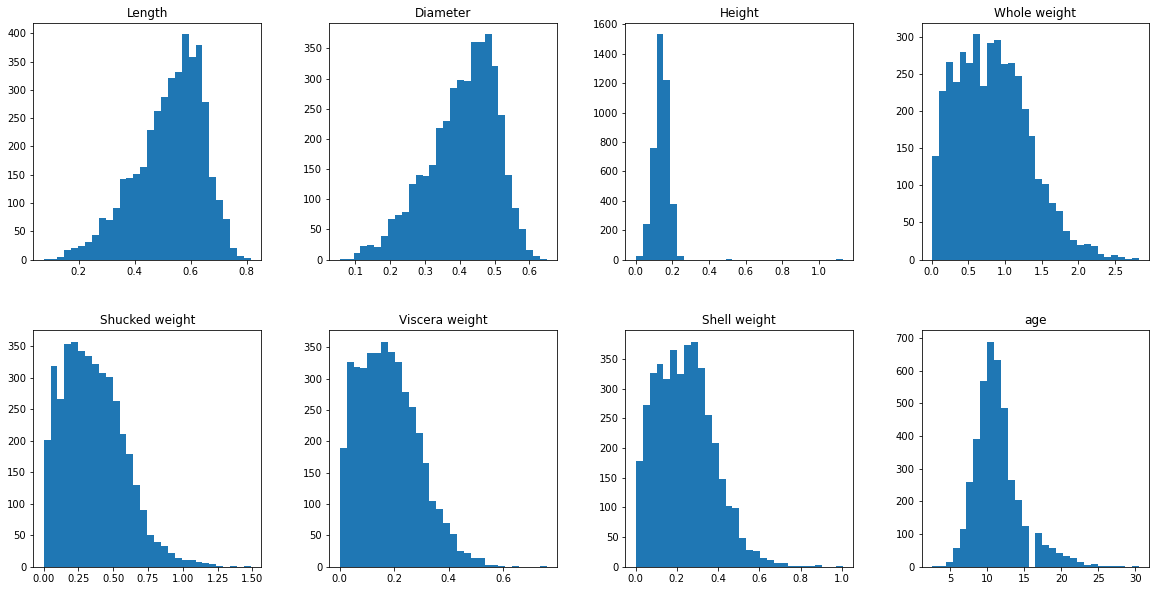

In [110]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [111]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


**3. BIVARIATE ANALYSIS & MULTIVARIATE ANALYSIS**

numerical_features = df.select_dtypes(include = [np.number]).columns
sns.pairplot(df[numerical_features])

**4. Descriptive statistics**

In [113]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


**4. Descriptive statistics**

In [114]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

**6. OUTLIER HANDLING**

In [115]:
df = pd.get_dummies(df)
dummy_data = df.copy()

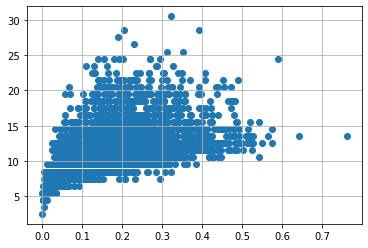

In [116]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [117]:
# outliers removal
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

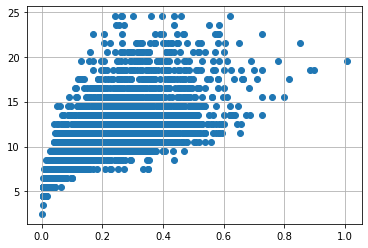

In [118]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)
#Outliers removal
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace=True)

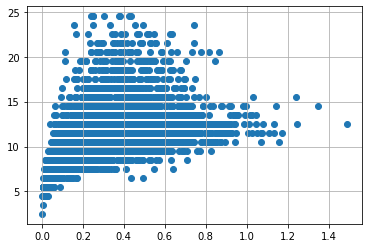

In [119]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

#Outlier removal
df.drop(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['age'] > 20)].index, inplace=True)

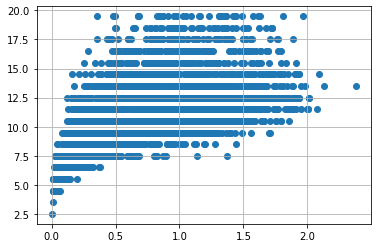

In [120]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

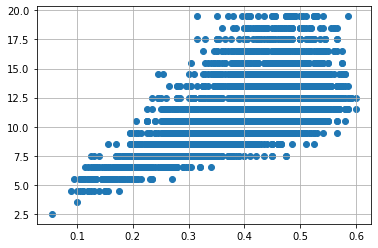

In [121]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Diameter'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['age'] < 25)].index, inplace = True)

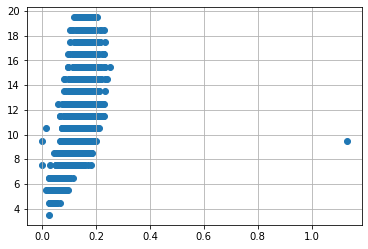

In [122]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)
df.drop(df[(df['Height'] > 0.4) &
          (df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['age'] > 25)].index, inplace = True)

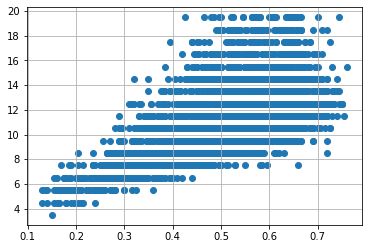

In [123]:
var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)

**7. Categorical columns**

In [124]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

C:\Users\hp\AppData\Local\Temp\ipykernel_15120\3796453440.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include = [np.object]).columns


In [125]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [126]:
categorical_features

Index([], dtype='object')

**ENCODING**

In [127]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(df.Length.value_counts())

0.575    93
0.625    91
0.580    89
0.550    89
0.620    83
         ..
0.220     2
0.150     1
0.755     1
0.135     1
0.760     1
Name: Length, Length: 126, dtype: int64


**8. Split the dependent and independent variables**

In [128]:
x=df.iloc[:,:5]
x


,Length,Diameter,Height,Whole weight,Shucked weight
0,0.455,0.365,0.095,0.5140,0.2245
1,0.350,0.265,0.090,0.2255,0.0995
2,0.530,0.420,0.135,0.6770,0.2565
3,0.440,0.365,0.125,0.5160,0.2155
4,0.330,0.255,0.080,0.2050,0.0895
...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700
4173,0.590,0.440,0.135,0.9660,0.4390
4174,0.600,0.475,0.205,1.1760,0.5255
4175,0.625,0.485,0.150,1.0945,0.5310


In [129]:
y=df.iloc[:,5:]
y

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.1010,0.1500,16.5,0,0,1
1,0.0485,0.0700,8.5,0,0,1
2,0.1415,0.2100,10.5,1,0,0
3,0.1140,0.1550,11.5,0,0,1
4,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...
4172,0.2390,0.2490,12.5,1,0,0
4173,0.2145,0.2605,11.5,0,0,1
4174,0.2875,0.3080,10.5,0,0,1
4175,0.2610,0.2960,11.5,1,0,0


**9. Feature Scaling**

In [136]:
from sklearn.preprocessing import scale

In [137]:
x=scale(x)
x

array([[-0.53701309, -0.39082366, -1.12698145, -0.61499511, -0.58787073],
       [-1.42965864, -1.4205279 , -1.26123393, -1.25364542, -1.19758369],
       [ 0.10059087,  0.17551367, -0.05296168, -0.25416322, -0.43178422],
       ...,
       [ 0.6956879 ,  0.741851  ,  1.82657293,  0.85046939,  0.88031807],
       [ 0.90822255,  0.84482142,  0.34979574,  0.67005344,  0.90714544],
       [ 1.63084038,  1.56561439,  1.55806799,  2.56054691,  2.9289536 ]])

In [142]:
y=df.iloc[:,5:]
y

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.1010,0.1500,16.5,0,0,1
1,0.0485,0.0700,8.5,0,0,1
2,0.1415,0.2100,10.5,1,0,0
3,0.1140,0.1550,11.5,0,0,1
4,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...
4172,0.2390,0.2490,12.5,1,0,0
4173,0.2145,0.2605,11.5,0,0,1
4174,0.2875,0.3080,10.5,0,0,1
4175,0.2610,0.2960,11.5,1,0,0


**10. Train , Test , Split**

In [144]:
from sklearn.preprocessing import scale

In [138]:
from sklearn.linear_model import LinearRegression

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


**11. Model building**

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

**12 & 13. Train and Test the model**

In [146]:
x_test[0:5]

array([[-0.79205468, -0.90567578, -0.32146662, -0.97250646, -1.12929584],
       [ 1.33329186,  1.41115875,  1.0210581 ,  1.68835203,  1.55831887],
       [-0.36698537, -0.23636803, -0.45571909, -0.77659467, -0.8122451 ],
       [-0.36698537, -0.39082366, -0.85847651, -0.82861644, -0.88053295],
       [-0.57952002, -0.5452793 , -0.05296168, -0.51316525, -0.55616566]])

In [147]:
y_test[0:5]


,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
2416,0.0565,0.1300,19.5,0,0,1
3795,0.2780,0.5120,13.5,0,0,1
1273,0.0885,0.1505,9.5,0,1,0
3644,0.0990,0.1270,8.5,0,1,0
3227,0.1370,0.1450,14.5,1,0,0


**14. Measure the performance using metrics**

In [148]:
from sklearn.metrics import r2_score
r2_score(mlr.predict(x_test),y_test)

-46.57722453410768